### Map about accidents on pedestrian crossings in Helsinki area 2018

The data about the accidents is from Tilastokeskus "Tieliikenneonnettomuudet 2018" dataset. 
https://etsin.fairdata.fi/dataset/047c2358-64fe-43ff-82e2-65db8865806f 

And the Helsinki municipality borders is from NLS.
https://etsin.fairdata.fi/dataset/d4a1a8ba-7fc2-4f84-ba3d-6dbaeeacca89

In [2]:
# Import essential modules
import pandas as pd
import geopandas as gpd
from pyproj import CRS
import matplotlib.pyplot as plt
import folium

# Filepaths
hel_fp = r"data/Helsinki_kunta.shp"
accident_fp = r"data/onnet_hel.shp"

# Reading files
hel = gpd.read_file(hel_fp)
accid = gpd.read_file(accident_fp)

In [3]:
# Checking CRS'
print(hel.crs)
print(accid.crs)

epsg:3067
None


In [4]:
accid.crs = hel.crs

In [5]:
print(hel.crs == accid.crs)
print(accid.crs)
print(hel.crs)

True
epsg:3067
epsg:3067


In [5]:
# Convert points to GeoJSON
accid_gjson = folium.features.GeoJson(accid, name="Accidents on pedestrian crossings")

# Convert municipality border to GeoJSON
hel_gjson = folium.features.GeoJson(hel, name="Helsinki's borders")

In [63]:
onnet = pd.read_csv('hel_onnet.csv', usecols=[0,1,3,4,12,13])

In [60]:
from shapely.geometry import Point
# Create an empty column for the DataFrame where the values will be stored
col_name = 'geometry'
onnet[col_name] = None

# Iterate over the rows
for i, row in onnet.iterrows():
    coord = Point(row['x'], row['y'])
    
    # Updating geometry column
    onnet.loc[i, col_name] = coord

In [71]:
geometry = [Point(xy) for xy in zip(onnet.x, onnet.y)]
accid = onnet.drop(['x', 'y'], axis=1)
gdf = gpd.GeoDataFrame(df, crs="EPSG:4326", geometry=geometry)

<AxesSubplot:>

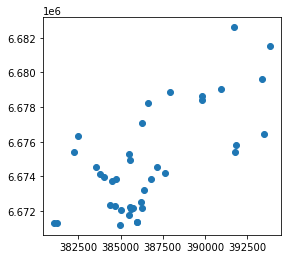

In [73]:
gdf.plot()

Let's create the map

In [15]:
from folium.plugins import MarkerCluster

# Create a Map instance
m = folium.Map(location=[60.22, 25.0], tiles='OpenStreetMap', zoom_start=11, control_scale=True)

# Add accidents and borders to the map instance
accid_gjson.add_to(m)

hel_gjson.add_to(m)

# Get x and y coordinates for each point
#accid["x"] = accid["geometry"].apply(lambda geom: geom.x)
#accid["y"] = accid["geometry"].apply(lambda geom: geom.y)

# Create a list of coordinate pairs
#locations = list(zip(points["y"], points["x"]))

# Create a layer control object and add it to our map instance
folium.LayerControl().add_to(m)

m

AttributeError: 'MultiPoint' object has no attribute 'x'

In [13]:
individual_points = [(pt.x, pt.y) for pt in accid['geometry']]
print(individual_points) 

AttributeError: 'MultiPoint' object has no attribute 'x'

In [14]:
accid.head()

,vvonn,kkonn,kello,vakav,onntyyppi,lkmhapa,lkmlaka,lkmjk,lkmpp,lkmmo,...,y,GML_ID,NATCODE,NAMEFIN,NAMESWE,LANDAREA,FRESHWAREA,SEAWAREA,TOTALAREA,geometry
0,2018,1,16.00-16.59,2,6,1,0,1,0,0,...,6674122.82,27817426,091,Helsinki,Helsingfors,214.25,0.91,500.32,715.48,MULTIPOINT (383792.471 6674122.817)
1,2018,1,19.00-19.59,2,6,1,0,1,0,0,...,6672326.58,27817426,091,Helsinki,Helsingfors,214.25,0.91,500.32,715.48,MULTIPOINT (384385.508 6672326.575)
2,2018,1,13.00-13.59,2,6,1,0,1,0,0,...,6679650.08,27817426,091,Helsinki,Helsingfors,214.25,0.91,500.32,715.48,MULTIPOINT (393404.912 6679650.079)
3,2018,1,08.00-08.59,2,6,0,1,1,0,0,...,6678250.23,27817426,091,Helsinki,Helsingfors,214.25,0.91,500.32,715.48,MULTIPOINT (386608.259 6678250.229)
4,2018,1,11.00-11.59,2,6,0,1,1,0,0,...,6671391.34,27817426,091,Helsinki,Helsingfors,214.25,0.91,500.32,715.48,MULTIPOINT (385961.992 6671391.341)


In [7]:
# Saving the map as HTML file
outfp = r"docs/accidents_map.html"
m.save(outfp)